In [2]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Embedding,Dense
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
df=pd.read_csv('../practice2/fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [4]:
df=df[['title','description','fraudulent']]

In [4]:
df.head()

,title,description,fraudulent
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",0
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,0
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",0
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,0


In [5]:
df.dropna(inplace=True)

In [6]:
len(df)

17879

In [6]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text
def CleanTokenize(df):
    head_lines = list()
    lines = df["description"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

description = CleanTokenize(df)
description[0:10]

[['fastgrowing',
  'james',
  'beard',
  'awardwinning',
  'online',
  'food',
  'community',
  'crowdsourced',
  'curated',
  'recipe',
  'hub',
  'currently',
  'interviewing',
  'full',
  'parttime',
  'unpaid',
  'interns',
  'work',
  'small',
  'team',
  'editors',
  'executives',
  'developers',
  'new',
  'york',
  'city',
  'headquartersreproducing',
  'andor',
  'repackaging',
  'existing',
  'content',
  'number',
  'partner',
  'sites',
  'huffington',
  'post',
  'yahoo',
  'buzzfeed',
  'various',
  'content',
  'management',
  'systemsresearching',
  'blogs',
  'websites',
  'provisions',
  'affiliate',
  'programassisting',
  'daytoday',
  'affiliate',
  'program',
  'support',
  'screening',
  'affiliates',
  'assisting',
  'affiliate',
  'inquiriessupporting',
  'pr',
  'amp',
  'events',
  'neededhelping',
  'office',
  'administrative',
  'work',
  'filing',
  'mailing',
  'preparing',
  'meetingsworking',
  'developers',
  'document',
  'bugs',
  'suggest',
  'impr

In [7]:
y=df.fraudulent.values

(-0.5, 999.5, 499.5, -0.5)

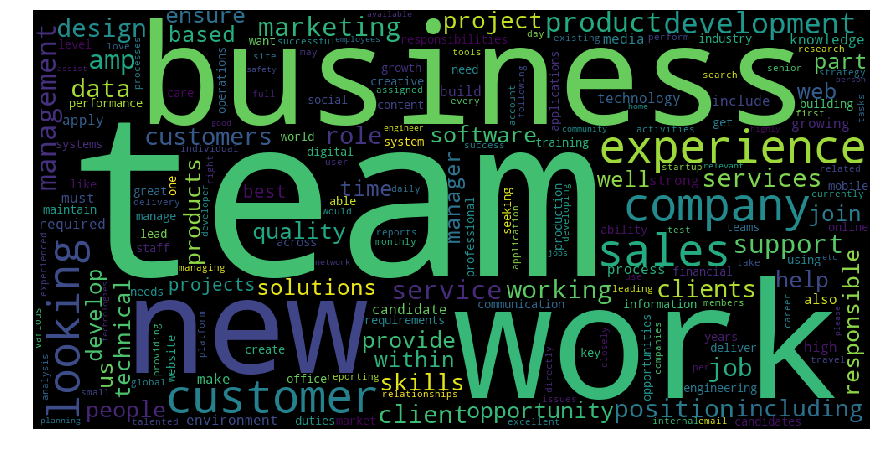

In [60]:
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator
pos_data=df.loc[df.fraudulent==1]
pos_description_line=preprocessing(pos_data)
pos_line=[j for sub in pos_description_line for j in sub]
word_cloud_dict=Counter(pos_line)
wordcloud=WordCloud(width=1000,height=500).generate_from_frequencies(word_cloud_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')

In [8]:
tokenizer=Tokenizer()

In [9]:
tokenizer.fit_on_texts(description)
encoded=tokenizer.texts_to_sequences(description)
vocab_size=len(tokenizer.word_index)+1
padded=pad_sequences(encoded,maxlen=100,padding='post')
vocab_size

92827

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(padded,y,test_size=0.25)

In [11]:
embedding_index={}
f=open('../DEEP_NLP_resources/data/glove.6B/glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values=line.split()
    word=values[0]
    coef=np.asarray(values[1:],dtype='float32')
    embedding_index[word]=coef
f.close()

In [12]:
embedding_matrix=np.zeros((vocab_size,100))
for word,i in tokenizer.word_index.items():
    embedding_vector=embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i]=embedding_vector

In [13]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=100,input_length=100,weights=[embedding_matrix],trainable=False))
model.add(LSTM(50,dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          9282700   
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 9,312,951
Trainable params: 30,251
Non-trainable params: 9,282,700
_________________________________________________________________


In [16]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 13409 samples, validate on 4470 samples
Epoch 1/5
 - 50s - loss: 0.2058 - acc: 0.9509 - val_loss: 0.1956 - val_acc: 0.9503
Epoch 2/5
 - 45s - loss: 0.1868 - acc: 0.9520 - val_loss: 0.1874 - val_acc: 0.9503
Epoch 3/5
 - 45s - loss: 0.1816 - acc: 0.9523 - val_loss: 0.1785 - val_acc: 0.9521
Epoch 4/5
 - 45s - loss: 0.1657 - acc: 0.9532 - val_loss: 0.1697 - val_acc: 0.9521
Epoch 5/5
 - 44s - loss: 0.1552 - acc: 0.9533 - val_loss: 0.1662 - val_acc: 0.9512


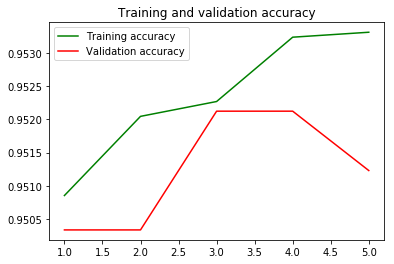

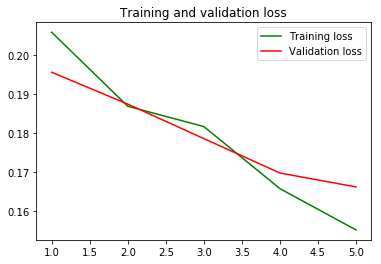

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
tokenizer.